In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv(
    '../data/ground-truth/data.csv', 
    sep=";", 
    decimal=',', 
    low_memory=False,
    parse_dates=['LastPaymentDate', 'PenultimatePaymentDate', 'Date of Birth'], 
    dayfirst=True
)
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [2]:
postcodes = df['postcode'].dropna().values
problematic_postcodes = []
valid_postcodes = []
wrong_pc_donors = 0

for postcode in postcodes:
    if len(postcode) != 4:
        problematic_postcodes.append(postcode)
    else:
        flag = True
        try:
            int(postcode)
        except ValueError:
            flag = False
        if flag:
            valid_postcodes.append(postcode)
        else:
            problematic_postcodes.append(postcode)
valid_postcodes = set(valid_postcodes)
        
for postcode in problematic_postcodes:
    wrong_pc_donors += len(df['postcode'].loc[(df['postcode'] == postcode)])


print(f"There is no postal code information for {(df['postcode'].isna().value_counts()[True]) / len(df):%} of donors")
print(f"At least {len(problematic_postcodes)} of the post codes are not valid Austrian postal codes.")
print(f"At least {wrong_pc_donors/len(df): %} have provided an invalid postal code.")


There is no postal code information for 2.256020% of donors
At least 740 of the post codes are not valid Austrian postal codes.
At least  0.264546% have provided an invalid postal code.


In [3]:
at_zip_to_state = {}

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")


for postalcode in pd.Series(list(valid_postcodes)).unique():
    #location = geolocator.geocode(postalcode, country_codes= 'at')
    # conversion into latitude and longitude only way to get country instead of just an address string
    flag = True
    try: 
        at_zip_to_state[postalcode]
    except KeyError:

        try:
            latlon = geolocator.geocode(postalcode, country_codes= 'at').raw['lat'], geolocator.geocode(postalcode, country_codes= 'at').raw['lon']
        except AttributeError:
                flag = False
        if flag:
            try:
                at_zip_to_state[postalcode] = geolocator.reverse(latlon, language= 'en').raw['address']['state']
            except KeyError:
                if postalcode[0] == '1':
                    at_zip_to_state[postalcode] = 'Vienna'
                
        else: 
            problematic_postcodes.append(postalcode)
            valid_postcodes.remove(postalcode)

In [25]:
zip_to_country = {}
german_zip_to_state = {}

In [37]:
# Importing required module
from geopy.geocoders import Nominatim
invalid_zips = []
# Using Nominatim Api
geolocator = Nominatim(user_agent="geoapiExercises")


# Zipcode input
for postalcode in pd.Series(problematic_postcodes).unique():
    if postalcode not in zip_to_country.keys():
        location = geolocator.geocode(postalcode)
            # conversion into latitude and longitude only way to get country instead of just an address string
        try:
            latlon = geolocator.geocode(postalcode).raw['lat'], geolocator.geocode(postalcode).raw['lon']
            country = geolocator.reverse(latlon, language= 'en').raw['address']['country']
            zip_to_country[postalcode] = country
            if country == 'Germany':
                try:
                    german_zip_to_state[postalcode] = geolocator.reverse(latlon, language= 'en').raw['address']['state'] 
                except KeyError:
                    if postalcode[0] == '1':
                        german_zip_to_state[postalcode] = 'Berlin'
        except AttributeError:
            invalid_zips.append(postalcode)

In [40]:
invalid_zips

['EH 8 9PJ', '999041', '8580673', '.', '345100']

In [58]:
postcode = invalid_zips[0].replace(' ', '')

latlon = geolocator.geocode(postcode).raw['lat'], geolocator.geocode(postcode).raw['lon']
country = geolocator.reverse(latlon, language= 'en').raw['address']['country']
zip_to_country[invalid_zips[0]] = country

In [94]:
df['country'] = df['postcode']
df['state'] = df['postcode']
df['country'].replace(list(at_zip_to_state.keys()), 'Austria', inplace = True)
df['state'].replace(at_zip_to_state, inplace = True)

In [ ]:
df['country'].replace(zip_to_country, inplace= True)
df['state'].replace(german_zip_to_state, inplace= True)
df['state'].replace(problematic_postcodes, 'undefined', inplace = True)

In [118]:
rfc_clusters = pd.read_csv('../data/ground-truth/segmented.csv') 
df['category'] = rfc_clusters['customer_segment']


,customer_number,gender,date_of_birth,postcode,count2015,sum2015,merchandise2015,count2016,sum2016,merchandise2016,count2017,sum2017,merchandiese2017,count2018,sum2018,merchandiese2018,count2019,sum2019,merchandise2019,lastpaymentdate,penultimatepaymentdate,country,state,category
0,1,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.50,0,2019-12-18,NaT,NaN,NaN,Loyal Customers
1,2,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,1.53,0,2019-12-28,NaT,NaN,NaN,Loyal Customers
2,3,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,3.00,0,2019-12-05,NaT,NaN,NaN,Lost
3,4,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.50,0,2019-06-04,NaT,NaN,NaN,Promising
4,5,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.95,0,2019-03-30,NaT,NaN,NaN,New Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406729,406730,male,1962-04-18,6284,2,30.0,0,0,0.0,0,0,0.0,0,1,15.00,0,1,45.00,0,2019-12-14,2018-09-27,Austria,Tyrol,Promising
406730,406731,male,1962-04-19,2801,2,15.0,0,1,20.0,0,0,0.0,0,1,15.00,0,2,52.50,0,2019-11-23,2019-09-27,Austria,Lower Austria,Champions
406731,406732,male,1962-04-19,3040,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,75.00,0,2019-12-18,2006-05-03,Austria,Lower Austria,Loyal Customers
406732,406733,male,1962-04-19,6170,2,22.5,0,1,30.0,0,0,0.0,0,1,11.25,0,0,0.00,0,2018-11-28,2016-11-14,Austria,Tyrol,Lost


In [127]:
from datetime import datetime, date

def calculate_age(born):
    
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['date_of_birth'].apply(calculate_age)


In [132]:
minimal_df = df[['customer_number', 'gender', 'age', 'postcode', 'country', 'state', 'category']]

In [138]:
minimal_df.dropna(subset='postcode')

,customer_number,gender,age,postcode,country,state,category
2070,2071,female,NaN,4318,Luxembourg,4318,Lost
2071,2072,female,NaN,6400,Iceland,6400,Loyal Customers
2072,2073,female,NaN,1000,Austria,Vienna,Promising
2073,2074,female,NaN,1010,Austria,Vienna,Promising
2076,2077,female,NaN,1010,Austria,Vienna,Lost
...,...,...,...,...,...,...,...
406729,406730,male,60.0,6284,Austria,Tyrol,Promising
406730,406731,male,60.0,2801,Austria,Lower Austria,Champions
406731,406732,male,60.0,3040,Austria,Lower Austria,Loyal Customers
406732,406733,male,60.0,6170,Austria,Tyrol,Lost


In [1]:
import pandas as pd
df = pd.read_csv('state_breakdown.csv')

In [22]:
df

,Unnamed: 0,customer_number,gender,age,postcode,region,state,total_sum,category
0,0,2073,female,NaN,1000,10,Vienna,45.00,Promising
1,1,2074,female,NaN,1010,10,Vienna,15.00,Promising
2,2,2077,female,NaN,1010,10,Vienna,15.00,Lost
3,3,2079,female,NaN,1010,10,Vienna,15.00,Loyal Customers
4,4,2080,female,NaN,1010,10,Vienna,22.50,Lost
...,...,...,...,...,...,...,...,...,...
396692,396692,406730,male,60.0,6284,62,Tyrol,90.00,Promising
396693,396693,406731,male,60.0,2801,28,Lower Austria,102.50,Champions
396694,396694,406732,male,60.0,3040,30,Lower Austria,75.00,Loyal Customers
396695,396695,406733,male,60.0,6170,61,Tyrol,63.75,Lost


In [2]:
# Statistik Austria 2019
federal_sates_populations = {'Burgenland': 301203, 
'Carinthia': 560939, 
'Lower Austria': 1677542, 
'Upper Austria': 1482095, 
'Salzburg': 555221, 
'Styria': 1243052, 
'Tyrol': 754705, 
'Vorarlberg': 394297, 
'Vienna': 1897491}

In [3]:
state_list = pd.Series(federal_sates_populations.keys())
population_list = pd.Series(federal_sates_populations.values())
federal_states = pd.DataFrame()
federal_states['state'] = state_list
federal_states['population'] = population_list
federal_states

,state,population
0,Burgenland,301203
1,Carinthia,560939
2,Lower Austria,1677542
3,Upper Austria,1482095
4,Salzburg,555221
5,Styria,1243052
6,Tyrol,754705
7,Vorarlberg,394297
8,Vienna,1897491


In [4]:
customers = []
new_per_capita = []
growths = []
lost_customers = []
loss_donorbase = []
reached = []
average_donations = []
average_donations_lost= []
for state in federal_states['state']:
    population = federal_states.loc[federal_states['state'] == state]['population'].values[0]
    reached.append(len(df.loc[df['state'] == state])/population *100)
    temp_df = df.loc[((df['state'] == state)) & (df['category'] != 'Lost') & (df['category'] != 'Lost Champions')]
    lost_df = df.loc[((df['state'] == state)) & (df['category'].isin(['Lost','Lost Champions']))]
    donors = len(temp_df)
    new = len(temp_df.loc[temp_df['category'] == 'New Customers'])
    lost = len(df.loc[((df['state'] == state)) & (df['category'] == 'Lost')])
    growth = new/donors *100


    lost_customers.append(round(lost/population*100,2))
    loss_donorbase.append(round(lost/(lost+donors)*100,2))
    customers.append(round(donors/population*100, 2))
    new_per_capita.append(new/population)
    growths.append(growth)
    average_donations.append(temp_df['total_sum'].mean())
    average_donations_lost.append(lost_df['total_sum'].mean())

In [12]:
federal_states['reached'] = pd.Series(reached).round(2)
federal_states['percentage_of_donors'] = pd.Series(customers)
# federal_states['lost (%of population)'] = pd.Series(lost_customers)
federal_states['donor retention in %'] = 100 - pd.Series(loss_donorbase)
federal_states['new_donors_per_10000_residents'] = (round(pd.Series(new_per_capita) * 10000).astype(int))
federal_states['donor_base_growth'] = pd.Series(growths)
federal_states['average_donation'] = pd.Series(average_donations)
federal_states['average_donation_lost_donor'] = pd.Series(average_donations_lost)

In [13]:
federal_states

,state,population,reached,percentage_of_donors,donor retention in %,new_donors_per_10000_residents,donor_base_growth,average_donation,average_donation_lost_donor
0,Burgenland,301203,4.73,2.86,60.86,23,7.887095,128.394518,130.141297
1,Carinthia,560939,4.63,2.70,58.69,23,8.450704,142.180941,141.754736
2,Lower Austria,1677542,5.24,3.11,59.91,26,8.240633,163.377666,155.112237
3,Upper Austria,1482095,4.46,2.68,60.55,21,7.983469,161.502567,161.599034
4,Salzburg,555221,4.48,2.69,60.46,22,8.327750,168.324734,160.395708
5,Styria,1243052,4.61,2.72,59.50,22,8.145934,151.973579,152.361195
6,Tyrol,754705,4.76,2.84,60.11,24,8.382003,209.444541,296.101672
7,Vorarlberg,394297,3.48,2.06,59.75,17,8.228628,133.540185,129.112628
8,Vienna,1897491,3.73,2.22,60.09,18,8.218268,238.748155,329.760062


In [34]:
qualitative_df = pd.DataFrame()
qualitative_df.index = pd.Series(sorted(df['category'].unique()))
for state in federal_states['state']:
    donorbase = len(df.loc[(df['state'] == state)])
    qualitative_df[f"{state}"] =(df.loc[(df['state'] == state)]['category'].value_counts().sort_index().values / donorbase *100).round(2)

In [64]:
qualitative_df.style.highlight_max(color = 'lightgreen', axis = 1).highlight_min(color = 'red', axis = 1).format(precision=2)


,Burgenland,Carinthia,Lower Austria,Upper Austria,Salzburg,Styria,Tyrol,Vorarlberg,Vienna
Champions,9.21,8.16,8.81,9.14,9.15,8.71,8.84,8.38,8.83
Hibernating,15.97,15.98,15.99,16.15,15.95,16.16,15.96,16.89,16.28
Lost,38.83,41.01,39.76,39.12,39.24,40.16,39.52,39.89,39.59
Lost Champions,0.79,0.72,0.82,0.83,0.77,0.84,0.93,0.88,0.79
Loyal Customers,23.19,21.34,22.43,22.42,22.49,21.89,22.43,22.00,22.36
New Customers,4.76,4.92,4.90,4.79,5.00,4.81,4.99,4.87,4.90
Potential Loyalists,0.65,0.73,0.69,0.65,0.73,0.66,0.67,0.63,0.66
Promising,6.60,7.14,6.62,6.89,6.68,6.78,6.66,6.46,6.60


In [32]:
temp = df.loc[((df['state'] == state)) & (df['category'] != 'Lost') & (df['category'] != 'Lost Champions')]

In [61]:
qualitative_df.iloc[2].values.mean()

39.68

In [67]:
quali = qualitative_df.transpose()

In [94]:
normalized_df=(quali-quali.mean())/quali.std()
#normalized_df=(quali-quali.min())/(quali.max()-quali.min())

In [95]:
normalized_df

,Champions,Hibernating,Lost,Lost Champions,Loyal Customers,New Customers,Potential Loyalists,Promising
Burgenland,1.148620,-0.589508,-1.320809,-0.467956,1.787946,-1.456219,-0.690626,-0.572024
Carinthia,-1.817079,-0.556348,2.066678,-1.601849,-1.860253,0.450104,1.569605,2.127039
Lower Austria,0.018830,-0.523188,0.124311,0.017998,0.289227,0.211814,0.439490,-0.472058
Upper Austria,0.950907,0.007369,-0.870180,0.179983,0.269507,-1.098784,-0.690626,0.877473
Salzburg,0.979152,-0.655827,-0.683713,-0.791926,0.407547,1.403266,1.569605,-0.172162
Styria,-0.263618,0.040529,0.745869,0.341968,-0.775653,-0.860493,-0.408097,0.327664
Tyrol,0.103564,-0.622667,-0.248623,1.799831,0.289227,1.284121,-0.125568,-0.272128
Vorarlberg,-1.195695,2.461194,0.326318,0.989907,-0.558733,-0.145622,-1.255684,-1.271781
Vienna,0.075319,0.438446,-0.139850,-0.467956,0.151187,0.211814,-0.408097,-0.572024


<AxesSubplot:>

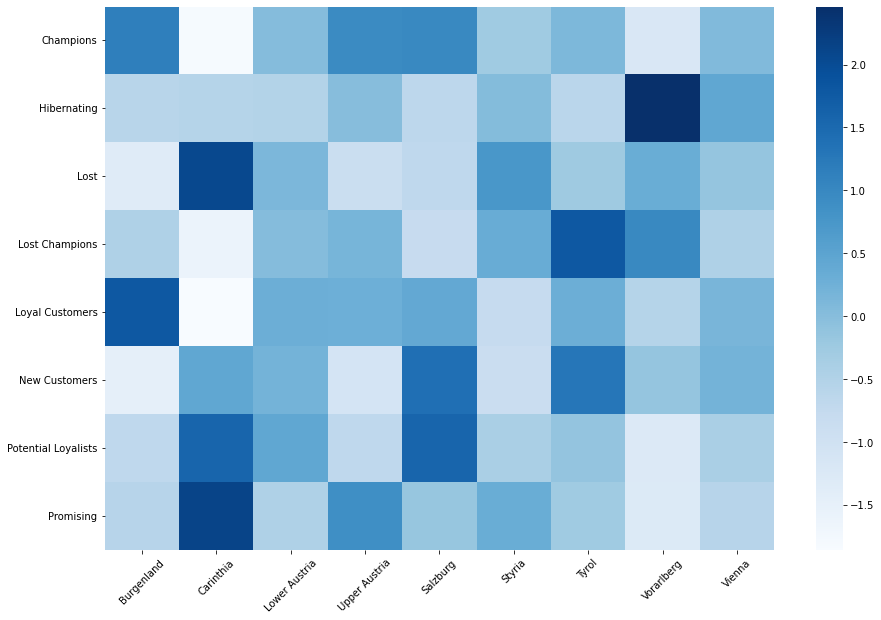

In [96]:
from seaborn import heatmap
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
chart = heatmap(normalized_df.transpose(), cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv(
    '../data/ground-truth/data.csv', 
    sep=";", 
    decimal=',', 
    low_memory=False,
    parse_dates=['LastPaymentDate', 'PenultimatePaymentDate', 'Date of Birth'], 
    dayfirst=True
)
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
df

,customer_number,gender,date_of_birth,postcode,count2015,sum2015,merchandise2015,count2016,sum2016,merchandise2016,count2017,sum2017,merchandiese2017,count2018,sum2018,merchandiese2018,count2019,sum2019,merchandise2019,lastpaymentdate,penultimatepaymentdate
0,1,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.50,0,2019-12-18,NaT
1,2,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,1.53,0,2019-12-28,NaT
2,3,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,3.00,0,2019-12-05,NaT
3,4,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.50,0,2019-06-04,NaT
4,5,female,NaT,NaN,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,4.95,0,2019-03-30,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406729,406730,male,1962-04-18,6284,2,30.0,0,0,0.0,0,0,0.0,0,1,15.00,0,1,45.00,0,2019-12-14,2018-09-27
406730,406731,male,1962-04-19,2801,2,15.0,0,1,20.0,0,0,0.0,0,1,15.00,0,2,52.50,0,2019-11-23,2019-09-27
406731,406732,male,1962-04-19,3040,0,0.0,0,0,0.0,0,0,0.0,0,0,0.00,0,1,75.00,0,2019-12-18,2006-05-03
406732,406733,male,1962-04-19,6170,2,22.5,0,1,30.0,0,0,0.0,0,1,11.25,0,0,0.00,0,2018-11-28,2016-11-14


In [20]:
geodf = pd.read_csv('state_breakdown.csv')
sums = pd.read_csv('total_sums.csv')


In [22]:
result = pd.merge(geodf, sums, on='customer_number')

In [31]:
result['region'] = result['postcode'].astype(str).str[:-2].astype(np.int64)

In [32]:
result

,Unnamed: 0_x,customer_number,gender,age,postcode,state,category,Unnamed: 0_y,total_sum,region
0,2072,2073,female,NaN,1000,Vienna,Promising,2072,45.00,10
1,2073,2074,female,NaN,1010,Vienna,Promising,2073,15.00,10
2,2076,2077,female,NaN,1010,Vienna,Lost,2076,15.00,10
3,2078,2079,female,NaN,1010,Vienna,Loyal Customers,2078,15.00,10
4,2079,2080,female,NaN,1010,Vienna,Lost,2079,22.50,10
...,...,...,...,...,...,...,...,...,...,...
396692,406729,406730,male,60.0,6284,Tyrol,Promising,406729,90.00,62
396693,406730,406731,male,60.0,2801,Lower Austria,Champions,406730,102.50,28
396694,406731,406732,male,60.0,3040,Lower Austria,Loyal Customers,406731,75.00,30
396695,406732,406733,male,60.0,6170,Tyrol,Lost,406732,63.75,61


In [33]:
new_df = result[['customer_number', 'gender', 'age', 'postcode', 'region', 'state', 'total_sum', 'category']]

In [34]:
new_df.to_csv('state_breakdown.csv')

In [39]:
new_df

,customer_number,gender,age,postcode,region,state,total_sum,category
0,2073,female,NaN,1000,10,Vienna,45.00,Promising
1,2074,female,NaN,1010,10,Vienna,15.00,Promising
2,2077,female,NaN,1010,10,Vienna,15.00,Lost
3,2079,female,NaN,1010,10,Vienna,15.00,Loyal Customers
4,2080,female,NaN,1010,10,Vienna,22.50,Lost
...,...,...,...,...,...,...,...,...
396692,406730,male,60.0,6284,62,Tyrol,90.00,Promising
396693,406731,male,60.0,2801,28,Lower Austria,102.50,Champions
396694,406732,male,60.0,3040,30,Lower Austria,75.00,Loyal Customers
396695,406733,male,60.0,6170,61,Tyrol,63.75,Lost
